# Module 2: Complex Models

In this exercise we will apply the machine learning models, we saw in todays exercise.
We will visualize the learned rules of the models with the `plot_decision_boundaries()` function.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import numpy as np
import pandas as pd

try:
    # Try to use the BI style sheet for plots
    plt.style.use('matplotlibrc')
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[(136/256, 76/256, 255/256), (60/256, 170/256, 207/256), (12/256, 229/256, 177/256)]) 
    
    colors = [(0.53125, 0.296875, 0.99609375), (0.453125, 0.3984375, 0.9453125), (0.375, 0.4921875, 0.89453125), (0.3046875, 0.578125, 0.8515625), (0.234375, 0.6640625, 0.80859375), (0.16015625, 0.75390625, 0.76171875), (0.09375, 0.8359375, 0.72265625), (0.046875, 0.89453125, 0.69140625), (0.0, 0.875, 0.6640625)]
    bicmap = LinearSegmentedColormap.from_list(name='BIcmp', 
                                                colors=colors,
                                                N=len(colors))
    cm_bright = ListedColormap([(0.53125, 0.296875, 0.99609375), (12/256, 229/256, 177/256)])
except:
    bicmap = plt.cm.BuGn 
    colors = ['r', 'g', 'b']


Bad key "axes.titlecolor" on line 99 in
C:\Users\nunezs\Downloads\ML\2_complex_models\matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "xtick.labelcolor" on line 109 in
C:\Users\nunezs\Downloads\ML\2_complex_models\matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "ytick.labelcolor" on line 111 in
C:\Users\nunezs\Downloads\ML\2_complex_models\matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "axes.titlecolor" on line 99 in
matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master

## **Exercise 2.1: Regression**

In this part of the exercise we use a regression problem and test different models and compare how well they fit the true target function.

Explain the fit of the different models.
Which model would you use to solve this particular problem?

In [2]:
reg_data = pd.read_csv('data_regression.csv')
reg_features = reg_data[['x']].values
reg_target = reg_data['y'].values
reg_data.head()

,x,y
0,0.000000,0.094287
1,0.368421,0.121948
2,0.736842,0.958494
3,1.105263,0.831052
4,1.473684,0.851171


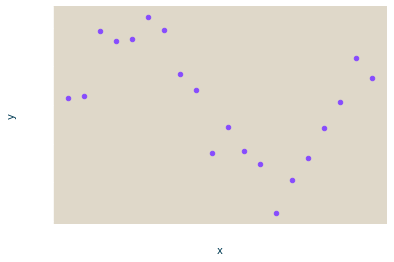

In [3]:
# Visualize the dataset
reg_data.plot.scatter(x='x', y='y')

In [4]:
# Helper function to plot the learned function and compare it to the true function
def plot_regression(rg, features, target):
    x_lin = np.linspace(features.min(), features.max(), 100)

    plt.scatter(features, rg.predict(features), color=(136/256, 76/256, 255/256), s=19, marker='o', label="prediction")
    plt.plot(x_lin, rg.predict(x_lin.reshape(-1, 1)), color=(60/256, 170/256, 207/256), linewidth=2, label="smooth prediction")
    plt.scatter(features, target, color=(12/256, 229/256, 177/256), s=19, marker='o', label="y")
    plt.plot(x_lin, np.sin(x_lin), color=(12/256, 229/256, 177/256), linewidth=2, label="true function")


    plt.legend(loc='lower left')
    plt.show()

### **Exercise 2.1.1: Linear Regression**

In [5]:
# Import the LinearRegression model
from sklearn.linear_model import LinearRegression

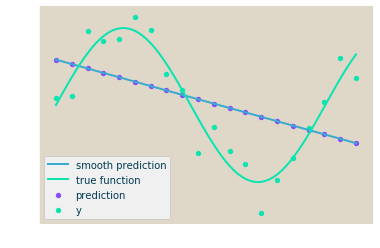

In [6]:
# Initialize the LinearRegression model
# TODO
lr = LinearRegression()
# Fit the model on the data
# TODO
lr.fit(reg_features,reg_target)
# Plot the learned function
# TODO
plot_regression(lr,reg_features,reg_target)


### **Exercise 2.1.2: Polynomial Regression**

In [7]:
# Import the PolynomialFeatures class
from sklearn.preprocessing import PolynomialFeatures

In [8]:
# Intialize the PolynomialFeatures
# TODO
pf = PolynomialFeatures()
# Use fit_transform to convert data into polynomial features
# TODO
pf_features = pf.fit_transform(reg_features)

In [9]:
# Initialize a LinearRegression model
# TODO
poly_reg = LinearRegression()
# Train the LinearRegression model on the polynomial features
# TODO
poly_reg.fit(pf_features, reg_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

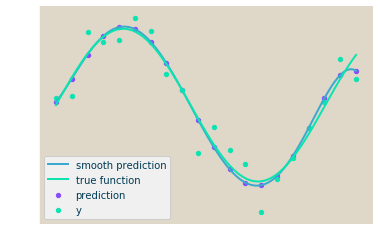

In [10]:
# With this setup we can't use plot_regression(), because the function poly_reg uses a different datasets
# Instead can create a pipeline that takes the original dataset and converts it into polynomial feature space before feeding it to the linear regression model
from sklearn.pipeline import make_pipeline

# Use make_pipeline() to create a pipeline of PolynomialFeatures() and LinearRegression() by passing instances of these two classes to make_pipeline()
# TODO
pipe = make_pipeline(PolynomialFeatures(5), LinearRegression())
# The pipeline can now be treated as a LinearRegression model
# Fit the pipeline with the original regression dataset
# TODO
pipe.fit(reg_features,reg_target)
# Pass the pipeline to the plot_regression() function together with the original regression dataset
# TODO
plot_regression(pipe,reg_features,reg_target)

**Try to adjust the number of polynomials with PolynomialFeatures(x), where x is maximum degree of polynomial features.**
Which degree fits the data best?

In [11]:
# TODO

### **Exercise 2.1.3: SVM**

In [12]:
# Import the Support Vector Regressor (SVR)
from sklearn.svm import SVR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


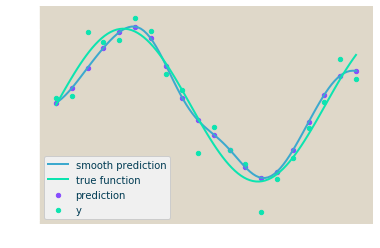

In [13]:
# Initialize the SVR model
# TODO
svr = SVR()
# Fit the Support Vector Machine
# TODO
svr.fit(reg_features,reg_target)
# Plot the learned regression function
# TODO
plot_regression(svr,reg_features,reg_target)

## **Exercise 2.2: Classification**

Fit each of the models and visualize the decision boundary. How does the theory behind the learning algorithm explain the decision boundaries you see in the plots?

Finally, decide which model you would use to solve this particular problem.

In [14]:
# Import the dataset
data = pd.read_csv('data.csv')
# Split into feature columns
features = data[['x', 'y']].values
# And the target column
target = data['z'].astype(int).values
data.head()

,x,y,z
0,1.630272,-0.868924,False
1,-0.135139,1.980376,False
2,0.968132,0.927734,True
3,-0.044578,-0.856085,False
4,-1.846415,-1.107561,False


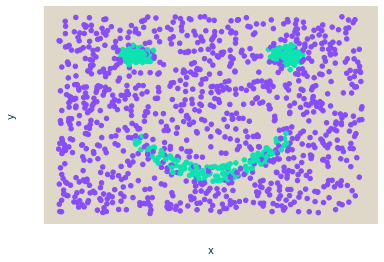

In [15]:
# Visualize the dataset
data.plot.scatter(x='x', y='y', c=data['z'], colormap=cm_bright, colorbar=False)

In [16]:
# Helper function for plotting the decision boundaries of a trained model
def plot_decision_boundaries(clf, x, y):
    h = 0.02  

    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=bicmap, alpha=.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_bright, edgecolors='k')

### **Exercise 2.2.1: Decision Tree**

In [17]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

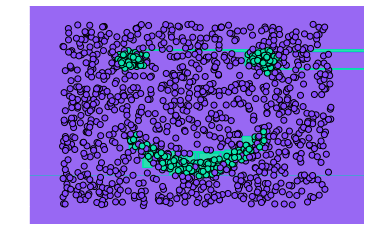

In [18]:
# Initialize the DecisionTree
# TODO
dt = DecisionTreeClassifier()
# Fit the decision tree on the data
# TODO
dt.fit(features, target)
# Plot the DecisionTree's decision boundaries
# TODO
plot_decision_boundaries(dt,features,target)

### **Exercise 2.2.2: RandomForest**

In [19]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


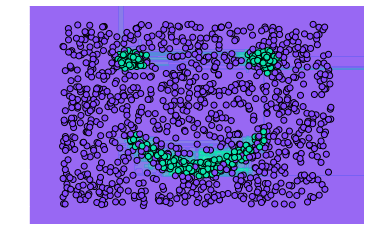

In [20]:
# Initialize the RandomForestClassifier
# TODO
rf = RandomForestClassifier()
# Fit the random forest on the data
# TODO
rf.fit(features, target)
# Plot the random forest decision boundaries
# TODO
plot_decision_boundaries(rf, features, target)

### **Exercise 2.1.3: Gradient Boosting**

In [21]:
# Import the GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

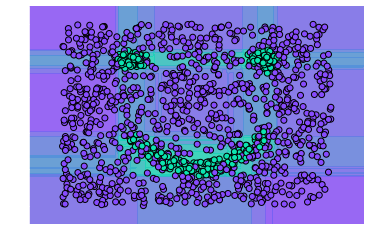

In [22]:
# Initialize the GradientBoostingClassifier
# TODO
gb = GradientBoostingClassifier()
# Fit the gradient boosting model on the data
# TODO
gb.fit(features, target)
# Plot the ensemble decision boundaries
# TODO
plot_decision_boundaries(gb, features, target)

### **Exercise 2.2.4: Multi-layer Perceptron**

In [23]:
# Import the MLPClassifier
from sklearn.neural_network import MLPClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


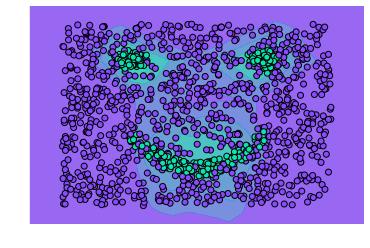

In [24]:
# Initialize the MLPClassifier
# TODO
mlp = MLPClassifier()
# Fit the neural network on the data
# TODO
mlp.fit(features, target)
# Plot the mlp decision boundaries
# TODO
plot_decision_boundaries(mlp, features, target)

## **Bonus**

There are a couple of models we haven't applied yet.

Apply the following models to the regression problem used above:
- DecisionTreeRegressor (from sklearn.tree import DecisionTreeRegressor)
- Mulit-layer Perceptron Regressor (from sklearn.neural_network import MLPRegressor)
- Random Forest Regressor (from sklearn.ensemble import RandomForestRegressor)
- Gradient Boosting Regressor (from sklearn.ensemble import GradientBoostingRegressor)

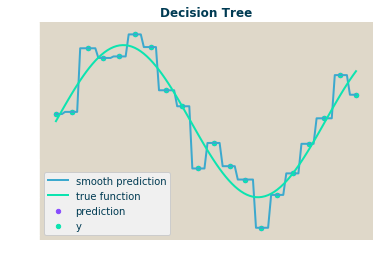

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


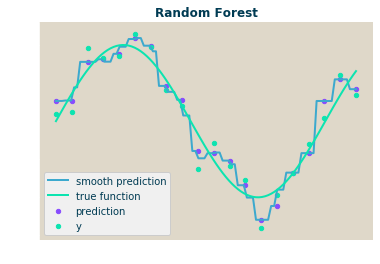

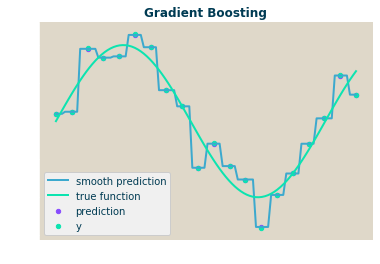

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


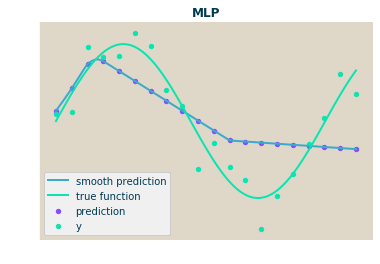

In [25]:
# TODO import the model, initialize it, fit it and evaluate it with plot_regression()
# Repeat the above steps for the other models
# Tip: You might want to use a loop for this

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

reg_names = [
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
    'MLP'
]

reg_models = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor()
]

for name, model in zip(reg_names, reg_models):
    model.fit(reg_features, reg_target)
    plt.title(name)
    plot_regression(model, reg_features, reg_target)
    


Apply the following models to the classification problem we used previously
- Logistic Regression (from sklearn.linear_model import LogisticRegression)
- Support Vector Classifier (SVC) (from sklearn.svm import SVC)

We can also apply the models to a number of different datasets and see how the results differ.
Apply the above models to the following datasets.

In [26]:
from sklearn.datasets import make_classification, make_circles, make_moons

x, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
x += 2 * np.random.default_rng(2).uniform(size=x.shape)
dataset2 = (x, y)

dataset3 = make_moons(noise=0.3, random_state=0)

dataset4 = make_circles(noise=0.2, factor=0.5, random_state=1)

AttributeError: module 'numpy.random' has no attribute 'default_rng'

In [ ]:
# TODO import the model, initialize it, fit it on one of the datasets and plot the decision boundaries
# Repeat the above steps for the other models
# Tip: You might want to use a loop for this

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

h = .02  # step size in the mesh

names = [
    'Logistic Regression',
    'Polynomial Logistic Regression',
    'Decision Tree',
    'SVM',
    'Random Forest',
    'Gradient Boosting'
]

classifiers = [
    LogisticRegression(),
    make_pipeline(PolynomialFeatures(), LogisticRegression()),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
    ]

datasets = [(features, target), dataset2, dataset3, dataset4]